In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

with open('products.json') as f:
    data = json.load(f)

dfs=[]
for category,items in data.items():
    df = pd.DataFrame(items)
    dfs.append(df)

result = pd.concat(dfs)


<class 'list'>


In [ ]:
# Remove "TND" and any non-numeric characters except decimal points
result['price'] = result['price'].astype(str).str.replace('TND','').str.strip()
result['price']=pd.to_numeric(result['price'], errors='coerce')

result.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    60 non-null     object 
 1   price   52 non-null     float64
 2   orders  60 non-null     int64  
 3   rating  60 non-null     float64
 4   link    60 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.5+ KB


Top 10 Winning Products:
                                                 name  price  orders  rating  \
2   POEDAGAR Luxury Man Watch Quartz Waterproof Lu...  39.87   10000     4.7   
4   2025 Hot Brand Stainless Steel Strap Watch Wom...  11.80    5000     4.6   
6   POEDAGAR Luxury Watch for Man Quartz Sports Me...  44.35    5000     4.7   
15  POEDAGAR Top Luxury Brand Man Watch Sports Wat...  34.87    4000     4.7   
10  POEDAGAR Luxury Military Man Watch Square Wate...  42.50    4000     4.7   
23  Women Watch Light Luxury Brand Business Gold S...  27.61    3000     4.8   
46  Small Oval Dial Green Watch Simple Stainless S...  10.24    2000     4.8   
18  UTHAI Men Watch Light Luxury Brand Stainless S...  30.11    3000     4.6   
37  Smart GPS Tracer Location Bluetooth Watch with...  20.93    2000     4.8   
16  POEDAGAR Luxury Fashion Men Clock Waterproof L...  39.80    3000     4.7   

       score  
2   0.925879  
4   0.802689  
6   0.770533  
15  0.751914  
10  0.742734  
23  

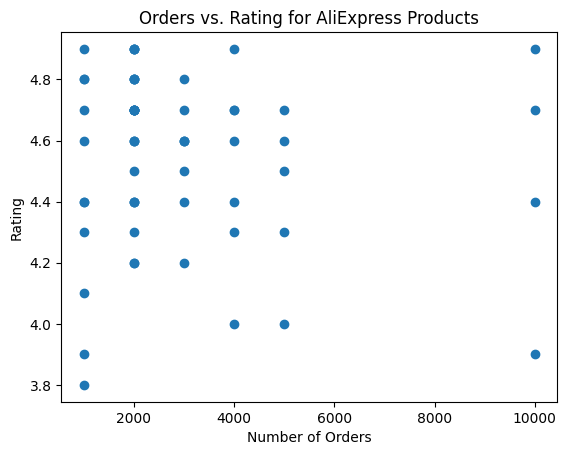

In [ ]:


# Filter for high-rated products
filtered_df = result[result['rating'] >= 4.5]

# Sort by orders (descending)
sorted_df = filtered_df.sort_values(by='orders', ascending=False)

# Calculate composite score with price
max_orders = result['orders'].max()
max_rating = 5
max_price = result['price'].max()

# Weights for each component (sum to 1)
weight_orders = 0.3
weight_rating = 0.4
weight_price = 0.3

# Normalize and calculate score with stronger price penalty
sorted_df['score'] = (
    (sorted_df['orders'] / max_orders) * weight_orders +
    (sorted_df['rating'] / max_rating) * weight_rating +
    ((max_price - sorted_df['price']) / max_price)**2 * weight_price  # Square the price component
)


# Sort by score
final_df = sorted_df.sort_values(by='score', ascending=False)

# Display top 10 winning products
print("Top 10 Winning Products:")
print(final_df[['name', 'price', 'orders', 'rating', 'score']].head(10))

# Visualize orders vs. rating
plt.scatter(result['orders'], result['rating'])
plt.xlabel('Number of Orders')
plt.ylabel('Rating')
plt.title('Orders vs. Rating for AliExpress Products')
plt.show()
